K-Fold-Cross-Validation

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
iris = load_iris()

In [4]:
X, y = iris.data, iris.target

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
model = LinearRegression()

In [7]:
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Test seti üzerinde tahmin yap ve hata hesapla
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

In [8]:
mean_score = np.mean(scores)

In [9]:
print("K-fold cross validation result: ", scores)
print("Mean Score: ", mean_score)

K-fold cross validation result:  [0.037113794407976915, 0.04287733169764372, 0.05339513046889765, 0.06316425044891769, 0.04779460065443833]
Mean Score:  0.04886902153557486


Confusion Matrix

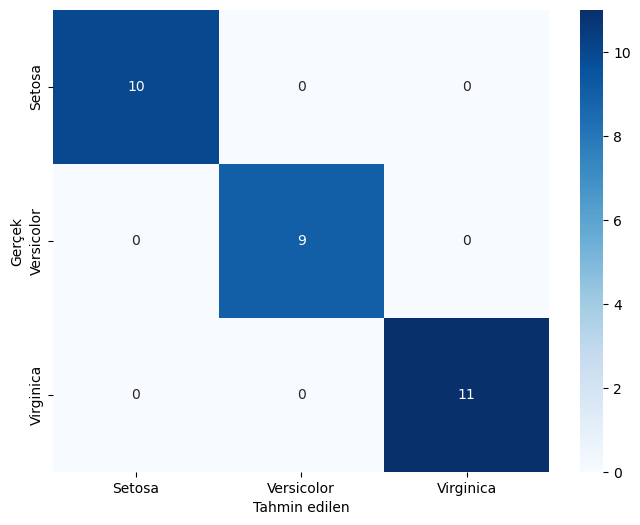

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Veri yükleme ve bölme
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Model eğitimi
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Tahminler
y_pred = clf.predict(X_test)

# Confusion matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
labels = ['Setosa', 'Versicolor', 'Virginica']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues) # annot=True parametresi sayesinde hücrelerin içindeki sayıları da gösteriyoruz.
plt.xlabel('Tahmin edilen')
plt.ylabel('Gerçek')
plt.show()
